#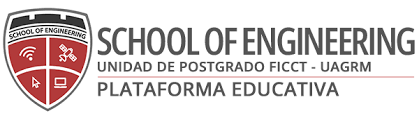

**Maestría en Ciencia de Datos e Inteligencia Artificial V1E5**
##MÓDULO 5 - Análisis Estadístico de Datos


**Universidad Autónoma Gabriel René Moreno de Santa Cruz de la Sierra-Bolivia UAGRM - POSTGRADO**<br/>
**Correlación Pearson**
# Magnitud y dirección de una relación lineal entre 2 variables<br/>



In [1]:
import matplotlib.pyplot as plt
import pandas as pd

personas = pd.read_csv("/content/personas.csv")
personas

,altura,peso,ingreso,horas_trabajadas,ausencias
0,134.433878,70.617864,9973.577534,40.905476,4
1,167.158746,109.268295,8961.047249,41.576483,4
2,141.480812,81.034644,7437.977263,41.369239,5
3,123.227119,57.884172,12064.915290,41.537211,3
4,143.554951,93.581093,9296.396167,40.441203,4
...,...,...,...,...,...
995,169.059462,109.612155,9998.522402,41.110352,4
996,151.873081,91.697127,6867.097603,40.617061,5
997,131.156800,78.301155,9757.539280,40.798085,4
998,156.454396,94.163603,11044.031510,41.443604,3


# Relación: Altura y Peso

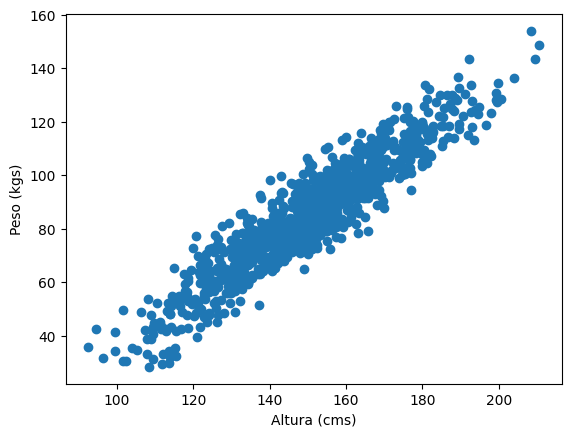

In [2]:
plt.scatter(personas["altura"], personas["peso"])
plt.xlabel("Altura (cms)")
plt.ylabel("Peso (kgs)")
plt.show()

# Relación: Ingreso y Horas Trabajadas

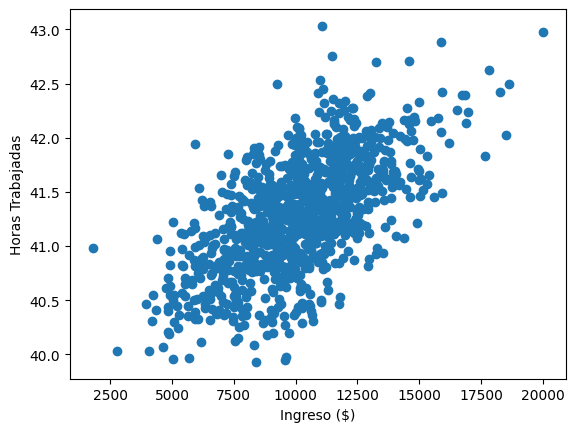

In [3]:
plt.scatter(personas["ingreso"], personas["horas_trabajadas"])
plt.xlabel("Ingreso ($)")
plt.ylabel("Horas Trabajadas")
plt.show()

# Relación: Ingreso y Ausencias

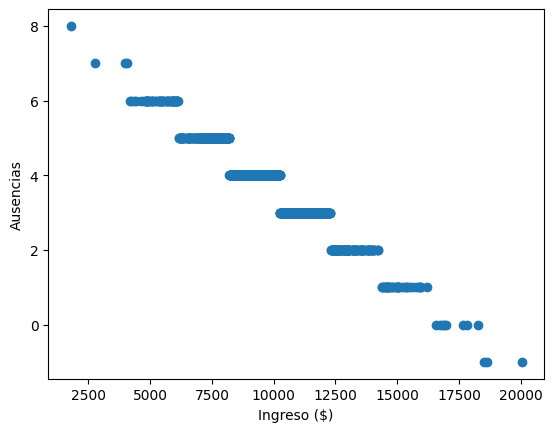

In [4]:
plt.scatter(personas["ingreso"], personas["ausencias"])
plt.xlabel("Ingreso ($)")
plt.ylabel("Ausencias")
plt.show()

# Relación: Ingreso y Peso de una persona

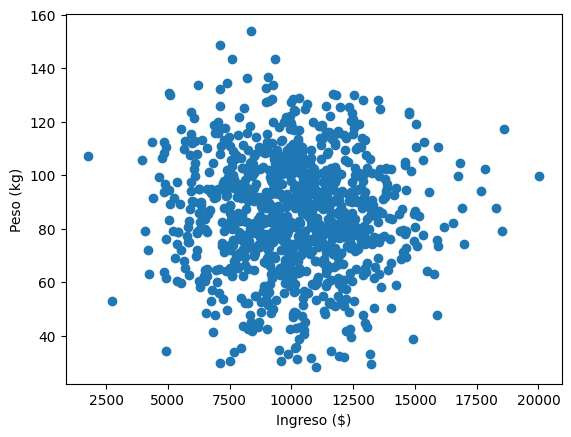

In [ ]:
plt.scatter(personas["ingreso"], personas["peso"])
plt.xlabel("Ingreso ($)")
plt.ylabel("Peso (kg)")
plt.show()

# Matriz de Correlación

In [5]:
personas.corr()

,altura,peso,ingreso,horas_trabajadas,ausencias
altura,1.000000,0.930608,-0.025283,0.008547,0.025587
peso,0.930608,1.000000,-0.029852,-0.002483,0.027450
ingreso,-0.025283,-0.029852,1.000000,0.625514,-0.973104
horas_trabajadas,0.008547,-0.002483,0.625514,1.000000,-0.603870
ausencias,0.025587,0.027450,-0.973104,-0.603870,1.000000


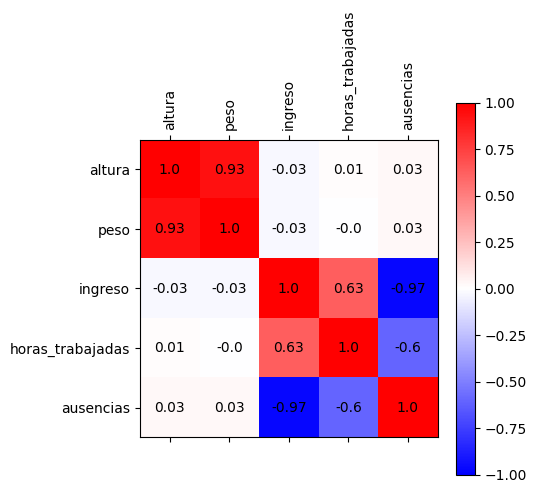

In [6]:
matriz = personas.corr() # -1 (existe una relación fuerte)  0   1 (existe relación fuerte)
plt.matshow(matriz, cmap="bwr", vmin=-1, vmax=1)
plt.xticks(range(5), personas.columns, rotation=90)
plt.yticks(range(5), personas.columns)

for i in range(len(matriz.columns)):
    for j in range(len(matriz.columns)):
        plt.text(i, j, round(matriz.iloc[i, j], 2),
                 ha="center", va="center")


plt.colorbar()
plt.show()

La correlación indica qué tan relacionadas están dos variables, tomando valores entre:

+1 → relación positiva fuerte (si una sube, la otra también).

0 → sin relación.

–1 → relación negativa fuerte (si una sube, la otra baja).

**Conclusiones:**

| Relación                                    | Tipo                     | Significado                                           |
| ------------------------------------------- | ------------------------ | ----------------------------------------------------- |
| Altura ↔ Peso                               | **Muy positiva (0.93)**  | Personas más altas pesan más.                         |
| Ingreso ↔ Horas trabajadas                  | **Positiva (0.63)**      | Más horas → mayor ingreso.                            |
| Ingreso ↔ Ausencias                         | **Muy negativa (-0.97)** | Más ausencias → menor ingreso.                        |
| Horas trabajadas ↔ Ausencias                | **Negativa (-0.60)**     | Quien trabaja más falta menos.                        |
| Altura / Peso ↔ Ingreso / Horas / Ausencias | **Sin relación (~0.00)** | Características físicas no afectan desempeño laboral. |


**Correlación Pearson y Sperman**

Coeficiente de Pearson: 0.90
Coeficiente de Spearman: 0.99


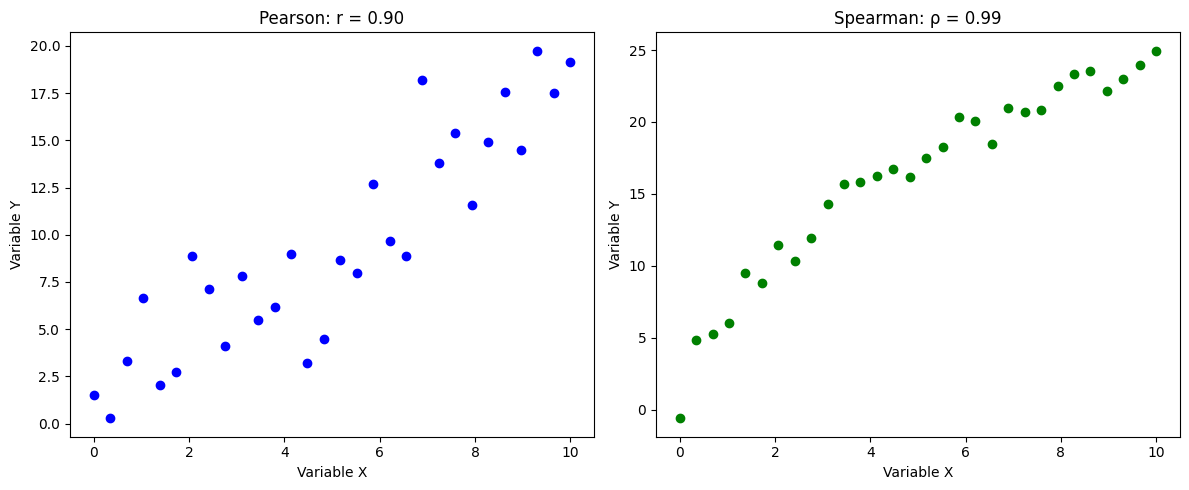

In [7]:
# --- Comparación Pearson vs Spearman ---
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr, spearmanr

# Semilla para reproducibilidad
np.random.seed(42)

# Datos simulados
x = np.linspace(0, 10, 30)

# Relación lineal (Pearson)
y_linear = 2*x + np.random.normal(0, 3, 30)

# Relación monótona no lineal (Spearman)
y_monotonic = np.log(x+1) * 10 + np.random.normal(0, 1, 30)

# Calcular coeficientes de correlación
pearson_corr, _ = pearsonr(x, y_linear)
spearman_corr, _ = spearmanr(x, y_monotonic)

# Imprimir resultados
print(f"Coeficiente de Pearson: {pearson_corr:.2f}")
print(f"Coeficiente de Spearman: {spearman_corr:.2f}")

# Graficar
fig, axes = plt.subplots(1, 2, figsize=(12,5))

# Pearson
axes[0].scatter(x, y_linear, color="blue")
axes[0].set_title(f"Pearson: r = {pearson_corr:.2f}")
axes[0].set_xlabel("Variable X")
axes[0].set_ylabel("Variable Y")

# Spearman
axes[1].scatter(x, y_monotonic, color="green")
axes[1].set_title(f"Spearman: ρ = {spearman_corr:.2f}")
axes[1].set_xlabel("Variable X")
axes[1].set_ylabel("Variable Y")

plt.tight_layout()
plt.show()


Pearson mide qué tan recta es la relación. Spearman mide qué tan consistente es la dirección de la relación.
Si la relación no es lineal pero sigue subiendo, Spearman la captura mejor que Pearson.

Pearson detecta y mide qué tan bien los datos se ajustan a una línea recta.
Cuando r es alto, como aquí, significa que el cambio en Y depende directamente y proporcionalmente del cambio en X.

Spearman no necesita que la relación sea una línea recta, solo que la dirección sea consistente (creciente o decreciente).
Por eso, detecta correctamente la fuerte asociación aunque la relación sea curva.

| Aspecto                      | Pearson                                | Spearman                                        |
| ---------------------------- | -------------------------------------- | ----------------------------------------------- |
| Tipo de relación que detecta | **Lineal**                             | **Monótona** (creciente o decreciente)          |
| Se basa en                   | Valores reales                         | **Rangos** (ordenamientos)                      |
| Sensible a curvas            | ❌ Sí (penaliza relaciones no lineales) | ✅ No (reconoce tendencias)                      |
| Mejor para                   | Física, economía lineal, predicciones  | Psicología, educación, comportamiento, biología |
| Resultado en este caso       | r = 0.90 (lineal fuerte)               | ρ = 0.99 (monótona muy fuerte)                  |


### **Ejemplo:**

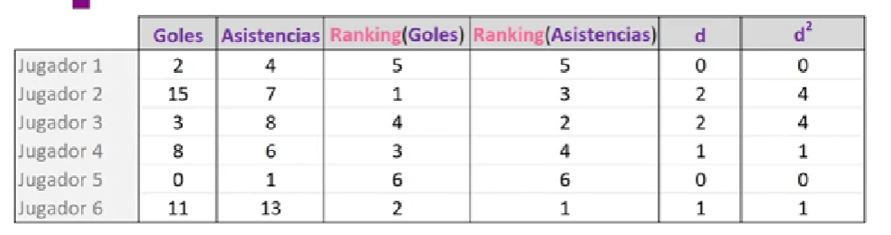

In [9]:
from scipy import stats
goles = [2, 15, 3, 8, 0, 11]
asistencias = [4, 7, 8, 6, 1, 13]
print(stats.spearmanr(goles,asistencias)[0])

0.7142857142857143


¿Qué significa?

A medida que un jugador anota más goles, también tiende a generar más asistencias.

Los jugadores más ofensivos (que participan activamente en el ataque) no solo finalizan jugadas, sino que también construyen oportunidades para otros.

En términos simples:

Los mejores goleadores suelen ser también los que más asisten.